In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#loading and cleaning the data
df=pd.read_csv(r"C:\Users\DELL\Downloads\retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)

In [6]:
df.info(),df['Date'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


(None,
 0   2023-11-24
 1   2023-02-27
 2   2023-01-13
 3   2023-05-21
 4   2023-05-06
 Name: Date, dtype: datetime64[ns])

In [7]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [8]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [9]:
#Descriptive Statistics
mean=df.mean(numeric_only=True)
median=df.median(numeric_only=True)
mode=df.mode(numeric_only=True).iloc[0]
std=df.std(numeric_only=True)
mean,median,mode,std

(Transaction ID    500.500
 Age                41.392
 Quantity            2.514
 Price per Unit    179.890
 Total Amount      456.000
 dtype: float64,
 Transaction ID    500.5
 Age                42.0
 Quantity            3.0
 Price per Unit     50.0
 Total Amount      135.0
 dtype: float64,
 Transaction ID     1.0
 Age               43.0
 Quantity           4.0
 Price per Unit    50.0
 Total Amount      50.0
 Name: 0, dtype: float64,
 Transaction ID    288.819436
 Age                13.681430
 Quantity            1.132734
 Price per Unit    189.681356
 Total Amount      559.997632
 dtype: float64)

In [10]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [11]:
df['Year']=df['Date'].dt.year
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023


In [12]:
np.unique(df['Year'])

array([2023, 2024])

In [13]:
df['Year'].value_counts()

Year
2023    998
2024      2
Name: count, dtype: int64

In [14]:
df['Months']=df['Date'].dt.month
df['Weekdays']=df['Date'].dt.day_name()
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Months,Weekdays
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,Friday
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,Monday
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,Friday
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,Sunday
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023,5,Tuesday
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023,11,Friday
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023,10,Sunday
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023,12,Tuesday


In [15]:
df['Months'].value_counts()

Months
5     105
10     96
8      94
12     91
4      86
2      85
11     78
1      78
6      77
3      73
7      72
9      65
Name: count, dtype: int64

In [16]:
df['Weekdays'].value_counts()

Weekdays
Tuesday      161
Saturday     150
Monday       146
Friday       143
Wednesday    139
Sunday       138
Thursday     123
Name: count, dtype: int64

In [17]:
#Time series Analysis:Monthly Sales Trend
df.set_index('Date',inplace=True)
monthly_sales=df['Total Amount'].resample('ME').sum()

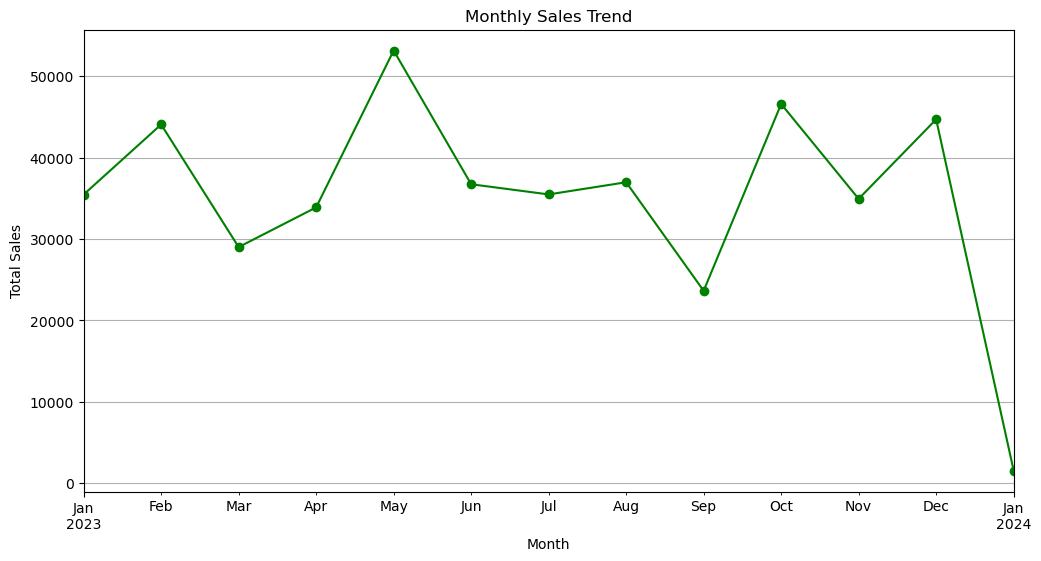

In [18]:
plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o',color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

In [19]:
#Customer and Product Analysis
#A.Gender-wise Total Sales
gender_sales=df.groupby('Gender')['Total Amount'].sum()
gender_sales

Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

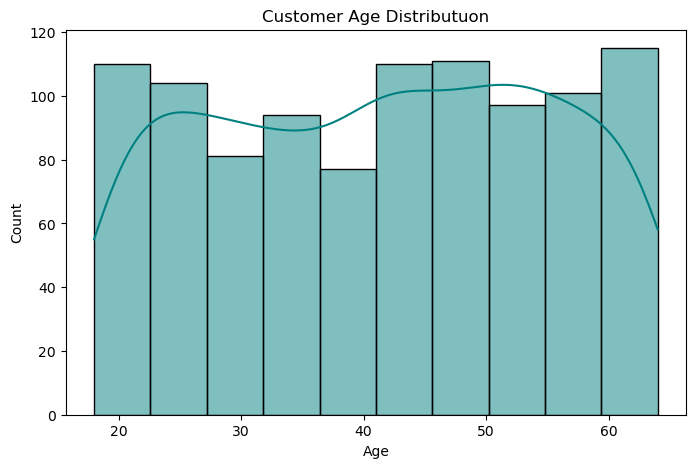

In [20]:
#B.Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'],bins=10,kde=True,color='teal')
plt.title("Customer Age Distributuon")
plt.xlabel('Age')
plt.show()

In [21]:
#C.Top Product Categories by Revenue
top_products=df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
top_products

Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64

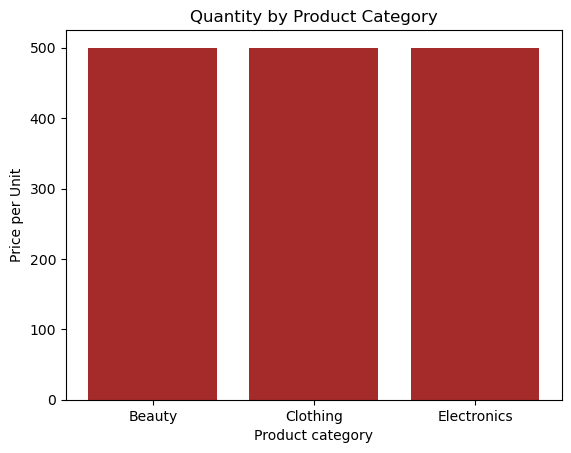

In [22]:
plt.Figure(figsize=(10,5))
plt.title("Quantity by Product Category")
plt.xlabel("Product category")
plt.ylabel('Price per Unit')
plt.bar(df['Product Category'],df['Price per Unit'],color='brown')
plt.show()

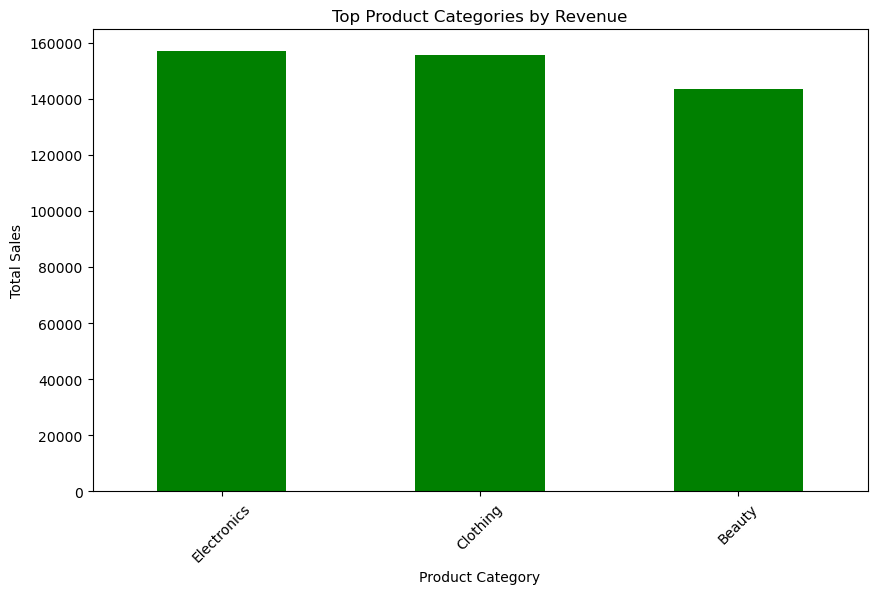

In [23]:
top_products.plot(kind='bar',figsize=(10,6),color='green')
plt.title('Top Product Categories by Revenue')
plt.ylabel('Total Sales')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()

(array([110., 104.,  81.,  94.,  77., 110., 111.,  97., 101., 115.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

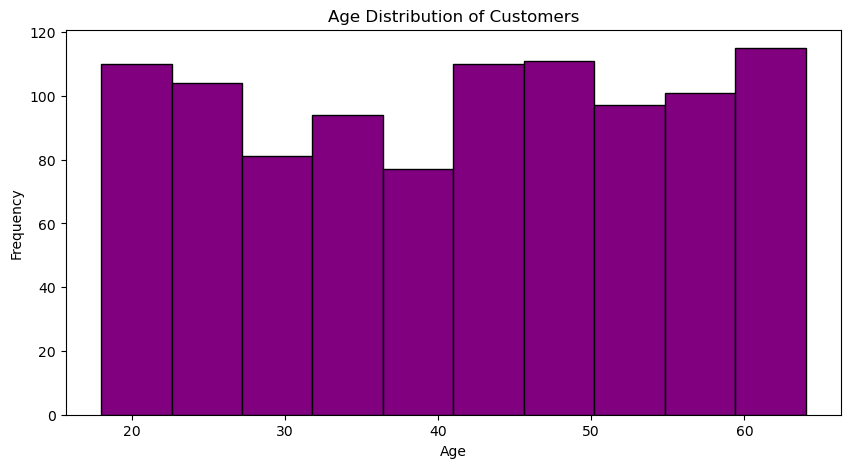

In [24]:
plt.figure(figsize=(10,5))
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.hist(df['Age'], color='purple', edgecolor='black')


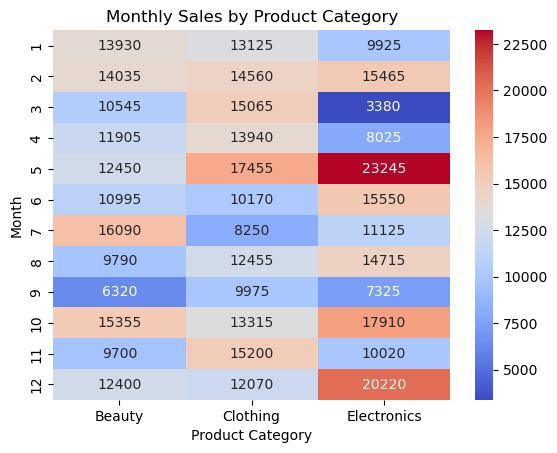

In [25]:
monthly_category_sales=df.groupby([df.index.month,'Product Category'])['Total Amount'].sum().unstack()
sns.heatmap(monthly_category_sales, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Monthly Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.show()

In [26]:
df1=pd.read_csv(r"C:\Users\DELL\Downloads\menu.csv")
df1.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [28]:
df1.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [29]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount,Year,Months
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000,2023.002000,6.549000
std,288.819436,13.68143,1.132734,189.681356,559.997632,0.044699,3.452755
min,1.000000,18.00000,1.000000,25.000000,25.000000,2023.000000,1.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000,2023.000000,4.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000,2023.000000,6.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000,2023.000000,10.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000,2024.000000,12.000000


In [30]:
category_counts=df1['Category'].value_counts()
category_counts

Category
Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: count, dtype: int64

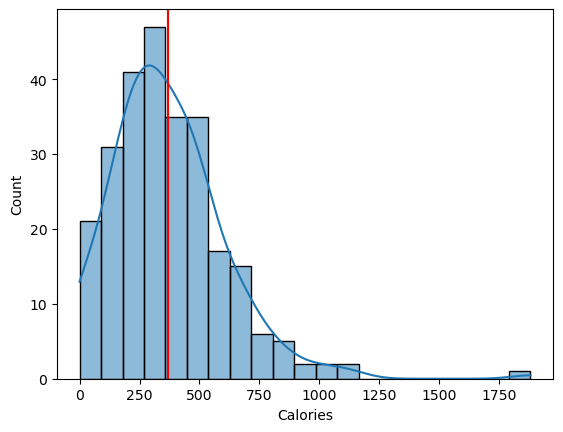

In [31]:
sns.histplot(df1,x='Calories',kde=True)
plt.axvline(df1['Calories'].mean(), color='red')
plt.show()

In [32]:
category_calories=df1.groupby('Category')['Calories'].mean().sort_values(ascending=False)
category_calories

Category
Chicken & Fish        552.962963
Smoothies & Shakes    531.428571
Breakfast             526.666667
Beef & Pork           494.000000
Coffee & Tea          283.894737
Salads                270.000000
Snacks & Sides        245.769231
Desserts              222.142857
Beverages             113.703704
Name: Calories, dtype: float64

Text(0, 0.5, 'Calories')

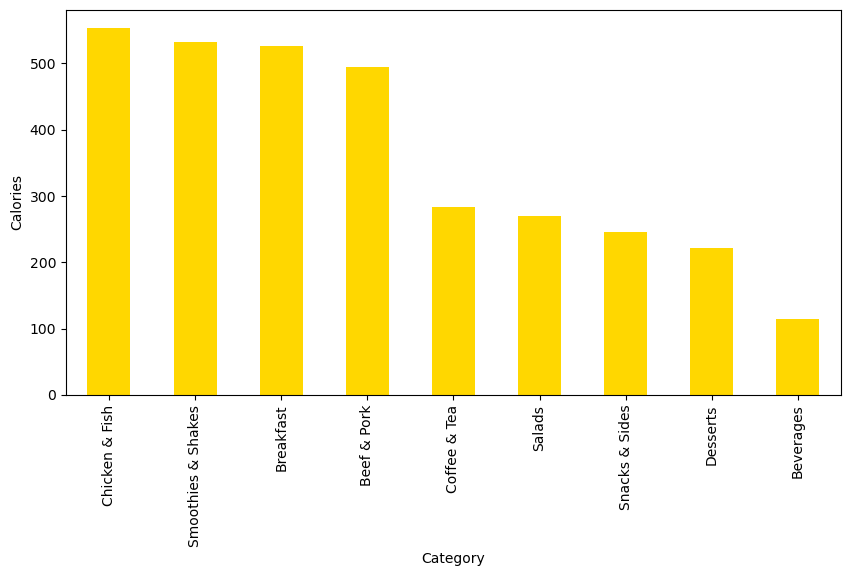

In [33]:
category_calories.plot(kind='bar',figsize=(10,5),color='gold')
plt.ylabel('Calories')

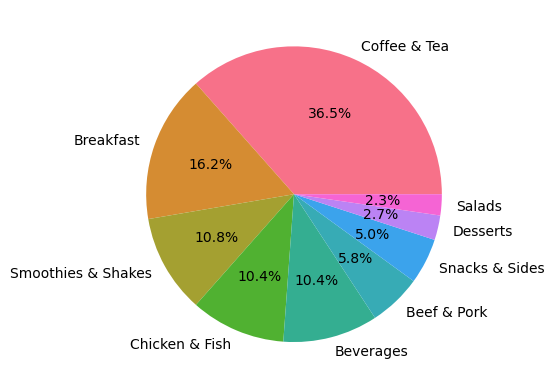

In [34]:
plt.Figure(figsize=(10,8))
colors=sns.color_palette('husl',len(category_counts))

plt.pie(category_counts,labels=category_counts.index,colors=colors,autopct='%1.1f%%')
plt.show()

<Axes: >

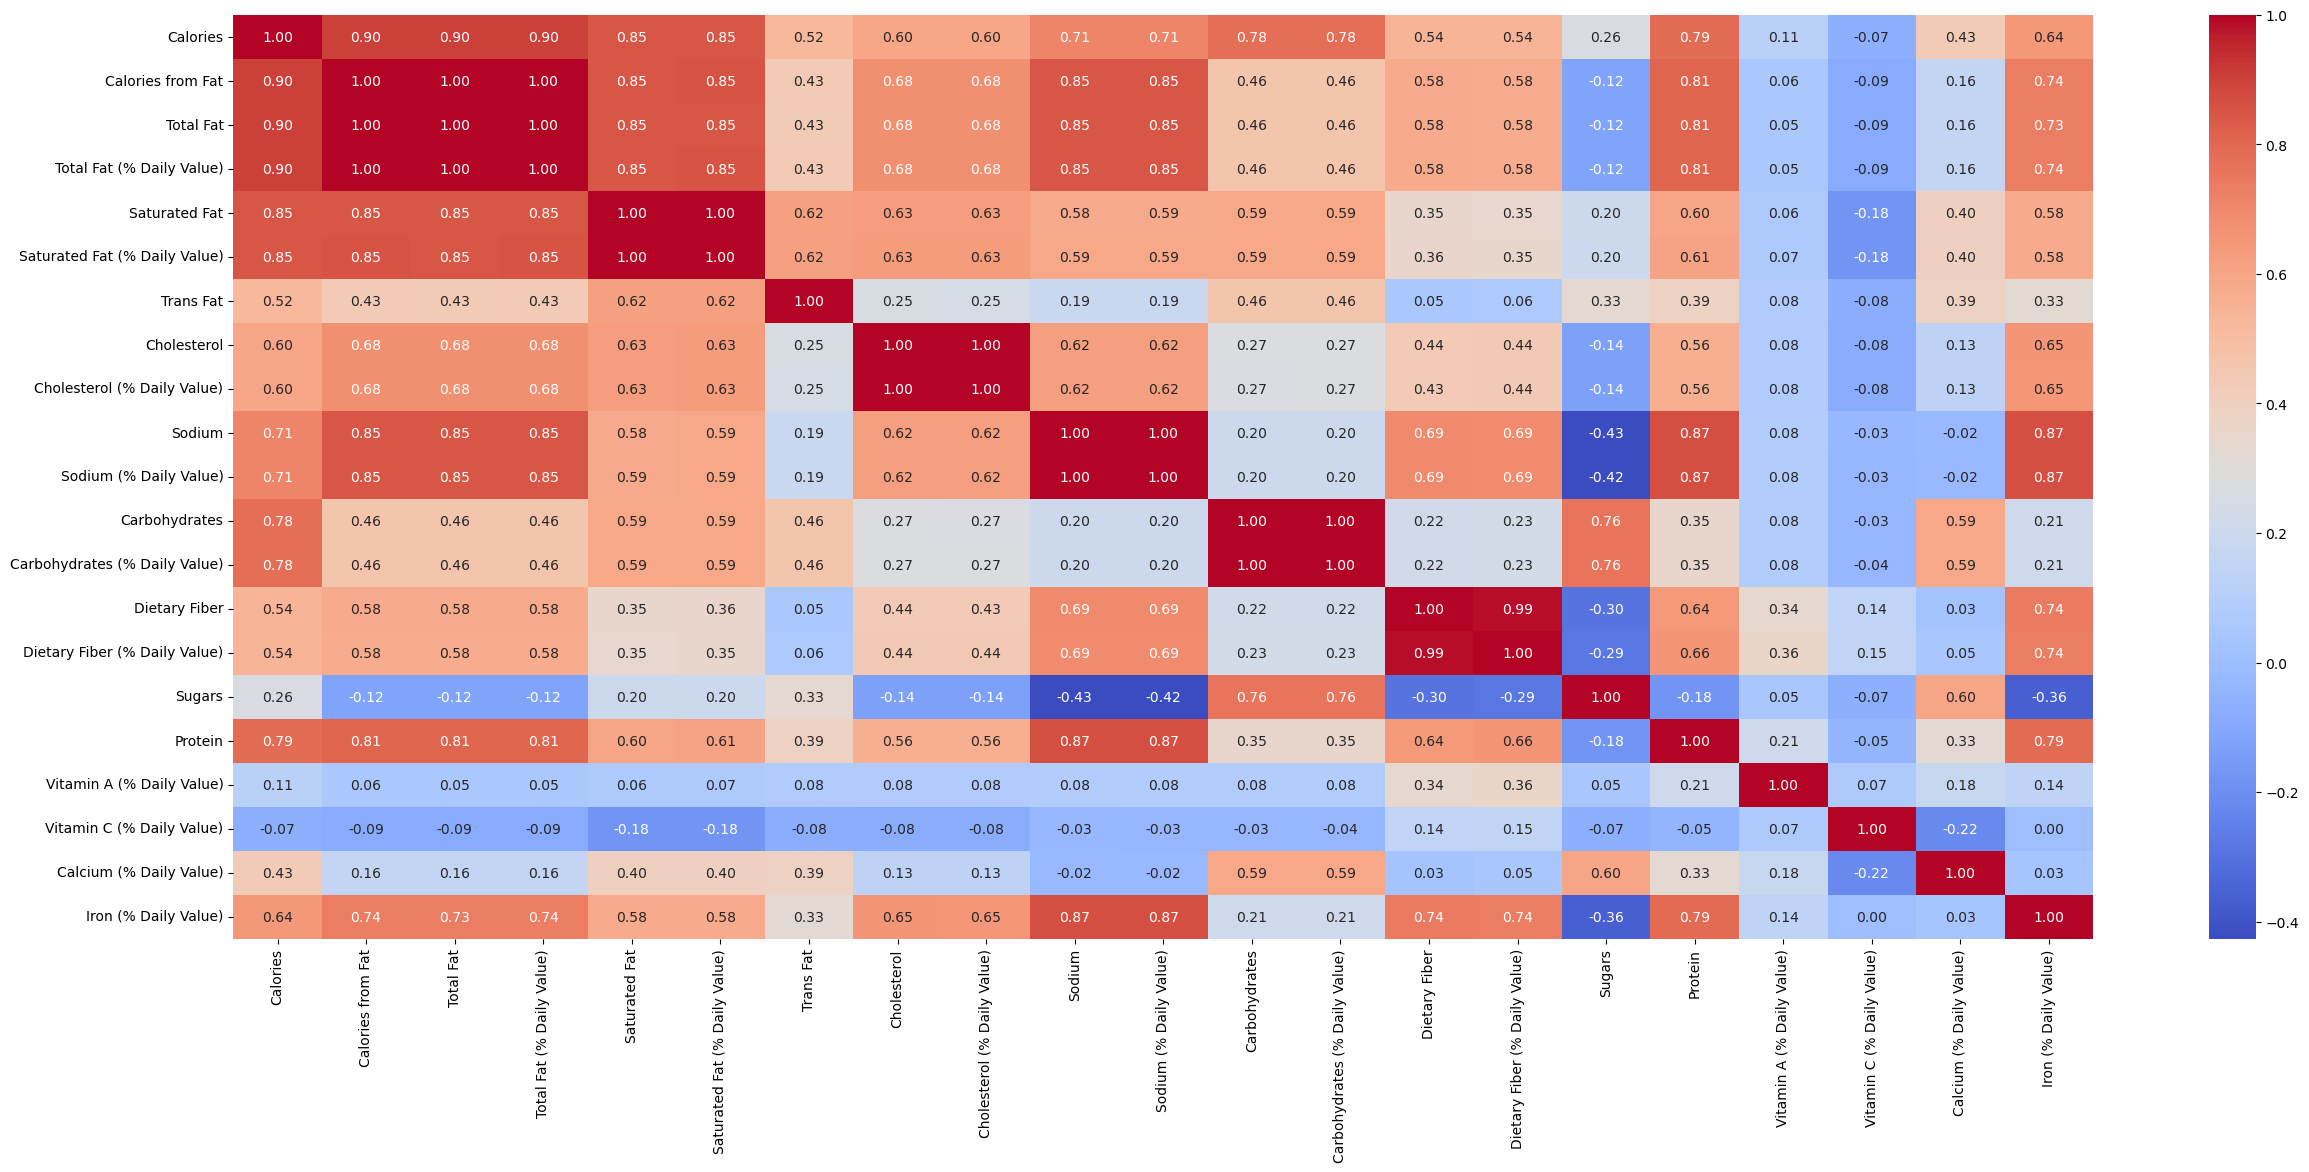

In [35]:
plt.figure(figsize=(30,12))
numeric_cols=df1.select_dtypes(include=[np.number]).columns
corr_matrix=df1[numeric_cols].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')

In [36]:
category_cholesterol=df1.groupby('Category')['Cholesterol (% Daily Value)'].mean().sort_values(ascending=False)
category_cholesterol


Category
Breakfast             50.952381
Beef & Pork           28.933333
Chicken & Fish        25.222222
Salads                17.333333
Smoothies & Shakes    14.714286
Coffee & Tea           9.378947
Snacks & Sides         6.230769
Desserts               4.857143
Beverages              0.185185
Name: Cholesterol (% Daily Value), dtype: float64

Text(0, 0.5, 'Cholesterol (% Daily Value)')

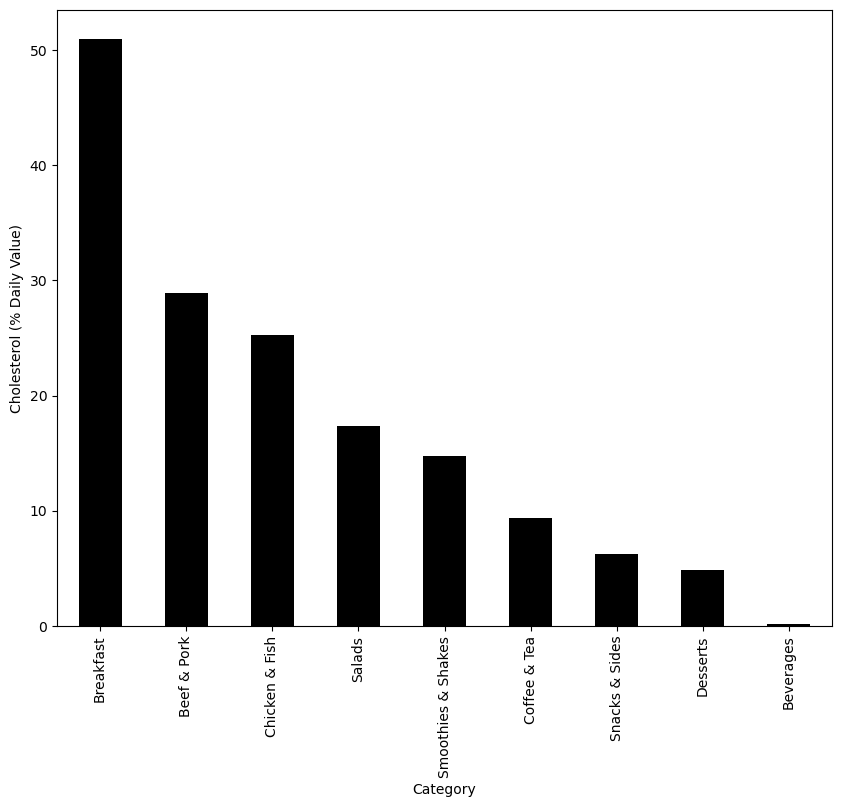

In [37]:
category_cholesterol.plot(kind='bar',figsize=(10,8),color='black')
plt.ylabel('Cholesterol (% Daily Value)')

<Figure size 1500x1500 with 0 Axes>

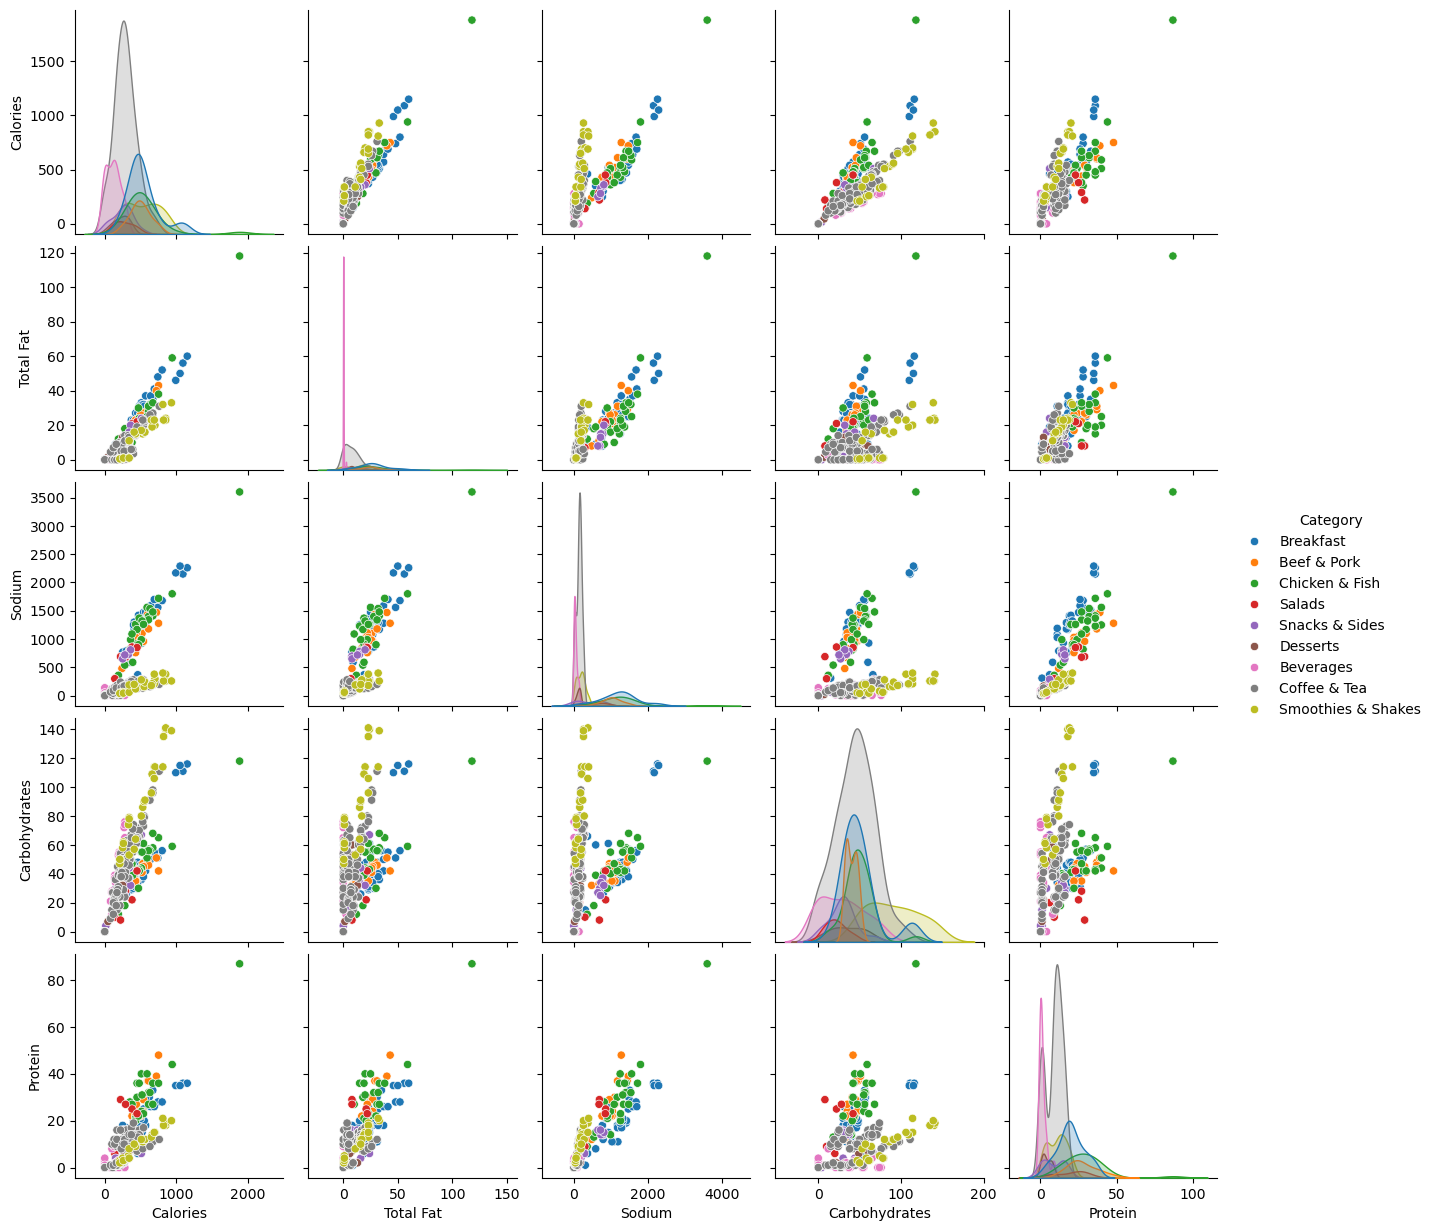

In [38]:
key_nutrients=['Calories','Total Fat','Sodium','Carbohydrates','Protein']
df_key=df1[key_nutrients+['Category']]
plt.figure(figsize=(15,15))
sns.pairplot(df_key,hue='Category',diag_kind='kde')
plt.show()

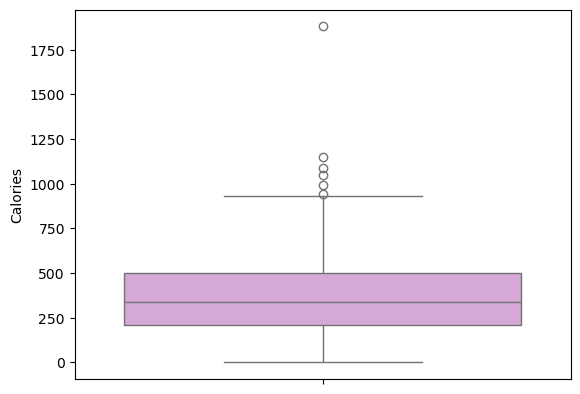

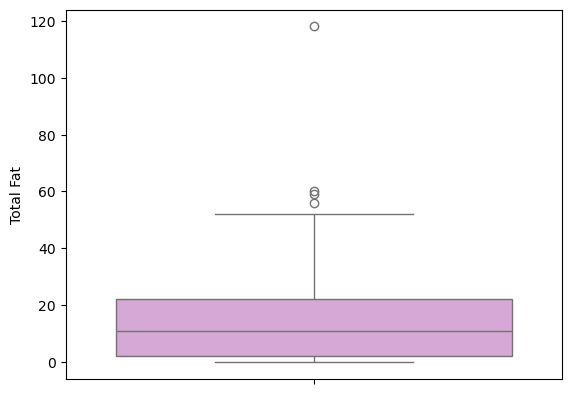

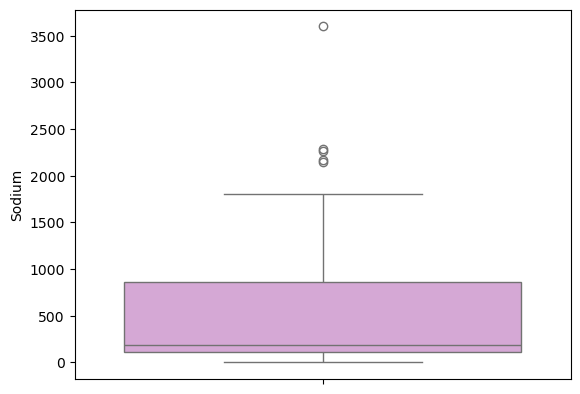

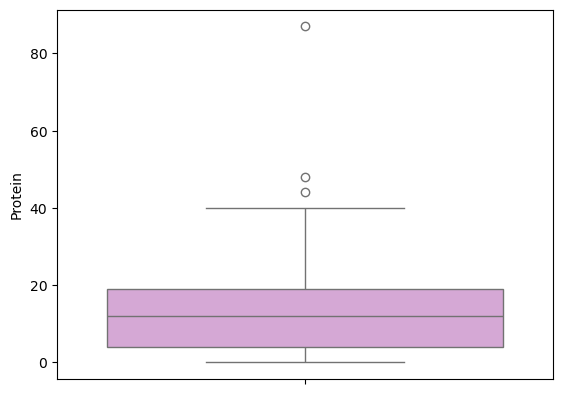

In [42]:
nutrients=['Calories','Total Fat','Sodium','Protein']
for i,nutrient in enumerate(nutrients):
    Q1=df1[nutrient].quantile(0.25)
    Q3=df1[nutrient].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=df1[(df1[nutrient]<lower_bound)|(df1[nutrient]>upper_bound)]
    sns.boxplot(df1,y=nutrient,color='plum')
    plt.show()
    